## Importing necessary libraries

In [1]:
import pandas as pd

### Reading the Manually Extracted Dataset from SEC's EDGAR's database

https://www.sec.gov/edgar/browse/?CIK=789019&owner=exclude

In [2]:
df=pd.read_csv('Initial.csv')
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company
0,2023,211915,72361,411976,205753,87582,Microsoft
1,2022,198270,72738,364840,198298,89035,Microsoft
2,2021,168088,61271,333779,191791,76740,Microsoft
3,2023,96773,14974,106618,43009,13256,Tesla
4,2022,81462,12556,82338,36440,14724,Tesla
5,2021,53821,5519,62131,30548,11497,Tesla
6,2023,383285,96995,352583,290437,110543,Apple
7,2022,394328,99803,352755,302083,122151,Apple
8,2021,365817,94680,351002,287912,104038,Apple


sort the values of year in ascending order grouped by 

company's name for more further analysis

In [3]:
df=df.sort_values(by=['Company','Year'])
df = df.reset_index(drop=True)
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company
0,2021,365817,94680,351002,287912,104038,Apple
1,2022,394328,99803,352755,302083,122151,Apple
2,2023,383285,96995,352583,290437,110543,Apple
3,2021,168088,61271,333779,191791,76740,Microsoft
4,2022,198270,72738,364840,198298,89035,Microsoft
5,2023,211915,72361,411976,205753,87582,Microsoft
6,2021,53821,5519,62131,30548,11497,Tesla
7,2022,81462,12556,82338,36440,14724,Tesla
8,2023,96773,14974,106618,43009,13256,Tesla


####  we will calculate year-over-year changes for each financial metric for Total Revenue and Net Income

In [4]:
df['Revenue Growth(%)']=df.groupby('Company')['Total Revenue'].pct_change()*100
df['Net Income Growth(%)']=df.groupby('Company')['Net Income'].pct_change()*100
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth(%),Net Income Growth(%)
0,2021,365817,94680,351002,287912,104038,Apple,NaN,NaN
1,2022,394328,99803,352755,302083,122151,Apple,7.793788,5.410858
2,2023,383285,96995,352583,290437,110543,Apple,-2.800461,-2.813543
3,2021,168088,61271,333779,191791,76740,Microsoft,NaN,NaN
4,2022,198270,72738,364840,198298,89035,Microsoft,17.956071,18.715216
5,2023,211915,72361,411976,205753,87582,Microsoft,6.882030,-0.518299
6,2021,53821,5519,62131,30548,11497,Tesla,NaN,NaN
7,2022,81462,12556,82338,36440,14724,Tesla,51.357277,127.504983
8,2023,96773,14974,106618,43009,13256,Tesla,18.795267,19.257725


from the above analysis we can observes the fall and rise of income and revenue growh over the few years, 

in the above data we are seeing the NaN value because for the year 2021 

we are not considering the previous year values.

Let us calculate some more financial metric year-over-year changes 

In [5]:
df['Assests Growth(%)']=df.groupby('Company')['Total Assets'].pct_change()*100
df['Liabilities Growth(%)']=df.groupby('Company')['Total Liabilities'].pct_change()*100
df['CashFlow Growth(%)']=df.groupby('Company')['Cash Flow from Operating Activities'].pct_change()*100
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth(%),Net Income Growth(%),Assests Growth(%),Liabilities Growth(%),CashFlow Growth(%)
0,2021,365817,94680,351002,287912,104038,Apple,NaN,NaN,NaN,NaN,NaN
1,2022,394328,99803,352755,302083,122151,Apple,7.793788,5.410858,0.499427,4.921990,17.409985
2,2023,383285,96995,352583,290437,110543,Apple,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
3,2021,168088,61271,333779,191791,76740,Microsoft,NaN,NaN,NaN,NaN,NaN
4,2022,198270,72738,364840,198298,89035,Microsoft,17.956071,18.715216,9.305858,3.392756,16.021631
5,2023,211915,72361,411976,205753,87582,Microsoft,6.882030,-0.518299,12.919636,3.759493,-1.631942
6,2021,53821,5519,62131,30548,11497,Tesla,NaN,NaN,NaN,NaN,NaN
7,2022,81462,12556,82338,36440,14724,Tesla,51.357277,127.504983,32.523217,19.287678,28.068192
8,2023,96773,14974,106618,43009,13256,Tesla,18.795267,19.257725,29.488207,18.026894,-9.970117


Data Preparation is almost completed.Now, we have to clean the collected data

we replace the NaN values with '0', to have easier and smoother analysis

In [6]:
df=df.fillna(0)
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth(%),Net Income Growth(%),Assests Growth(%),Liabilities Growth(%),CashFlow Growth(%)
0,2021,365817,94680,351002,287912,104038,Apple,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022,394328,99803,352755,302083,122151,Apple,7.793788,5.410858,0.499427,4.921990,17.409985
2,2023,383285,96995,352583,290437,110543,Apple,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
3,2021,168088,61271,333779,191791,76740,Microsoft,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022,198270,72738,364840,198298,89035,Microsoft,17.956071,18.715216,9.305858,3.392756,16.021631
5,2023,211915,72361,411976,205753,87582,Microsoft,6.882030,-0.518299,12.919636,3.759493,-1.631942
6,2021,53821,5519,62131,30548,11497,Tesla,0.000000,0.000000,0.000000,0.000000,0.000000
7,2022,81462,12556,82338,36440,14724,Tesla,51.357277,127.504983,32.523217,19.287678,28.068192
8,2023,96773,14974,106618,43009,13256,Tesla,18.795267,19.257725,29.488207,18.026894,-9.970117


Now, we can see that data is all clear with no null/NaN values and ready for further analysis

As the next step, we will apply some aggregate functions on the data collected to understand the data more clearly.

In [7]:
df_excluded = df.drop(columns=['Year'])
mean_values = df_excluded.groupby('Company').mean()
mean_values

,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth(%),Net Income Growth(%),Assests Growth(%),Liabilities Growth(%),CashFlow Growth(%)
Company,,,,,,,,,,
Apple,381143.333333,97159.333333,352113.333333,293477.333333,112244.000000,1.664442,0.865772,0.150223,0.355586,2.635664
Microsoft,192757.666667,68790.000000,370198.333333,198614.000000,84452.333333,8.279367,6.065639,7.408498,2.384083,4.796563
Tesla,77352.000000,11016.333333,83695.666667,36665.666667,13159.000000,23.384181,48.920903,20.670475,12.438191,6.032692


Calculating average values for each comapny over the three years on all 

financial metrics made us to understand the company's value and the growth of the company as well.

In the above analysis, we can see that Apple has the highest Revune over the three years but Revenue growth is small,

whereas Telsa has less revenue compared to others but the revenue growth is highly sustainable compared to others


###### Saving the above obtained data as a seperate file for easy retrieval of information for future purposes

In [8]:
mean_values.to_csv('summary.csv')

#### Some more ratios in financial analysis, that assess different aspects of a company's profitability 

Return on Equity (ROE): Measures the profitability of a company in relation to liabilities.

Return on Assets (ROA): Indicates how efficiently a company uses its assets to generate profit.

Profit Margin: Represents the percentage of revenue that turns into profit after accounting for all expenses.

In [9]:
df['Profit Margin'] = df['Net Income'] / df['Total Revenue'] * 100

df['ROA'] = df['Net Income'] / df['Total Assets'] * 100

df['ROE'] = df['Net Income'] / (df['Total Assets'] - df['Total Liabilities']) * 100

df


,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth(%),Net Income Growth(%),Assests Growth(%),Liabilities Growth(%),CashFlow Growth(%),Profit Margin,ROA,ROE
0,2021,365817,94680,351002,287912,104038,Apple,0.000000,0.000000,0.000000,0.000000,0.000000,25.881793,26.974205,150.071327
1,2022,394328,99803,352755,302083,122151,Apple,7.793788,5.410858,0.499427,4.921990,17.409985,25.309641,28.292441,196.958873
2,2023,383285,96995,352583,290437,110543,Apple,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992,25.306234,27.509835,156.076015
3,2021,168088,61271,333779,191791,76740,Microsoft,0.000000,0.000000,0.000000,0.000000,0.000000,36.451740,18.356757,43.152238
4,2022,198270,72738,364840,198298,89035,Microsoft,17.956071,18.715216,9.305858,3.392756,16.021631,36.686337,19.936959,43.675469
5,2023,211915,72361,411976,205753,87582,Microsoft,6.882030,-0.518299,12.919636,3.759493,-1.631942,34.146238,17.564373,35.088715
6,2021,53821,5519,62131,30548,11497,Tesla,0.000000,0.000000,0.000000,0.000000,0.000000,10.254362,8.882844,17.474591
7,2022,81462,12556,82338,36440,14724,Tesla,51.357277,127.504983,32.523217,19.287678,28.068192,15.413322,15.249338,27.356312
8,2023,96773,14974,106618,43009,13256,Tesla,18.795267,19.257725,29.488207,18.026894,-9.970117,15.473324,14.044533,23.540694


This a pictorial representation of growth ratios of Profit Margin and ROA

From this image we can clearly states the operations of growth raio are stable and 

the big companies are makng their good enough to return profits as much as possible

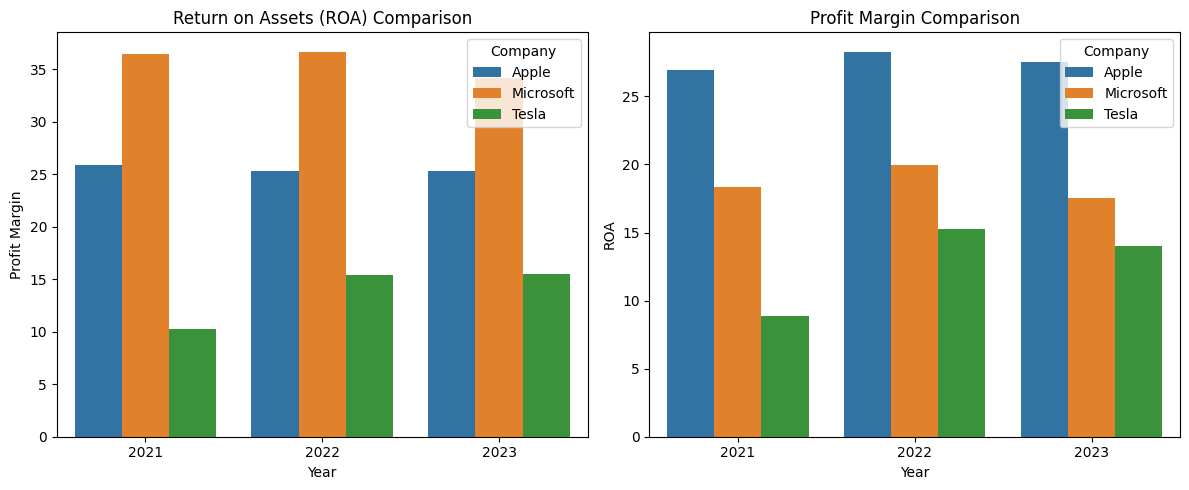

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

sns.barplot(data=df, x='Year', y='Profit Margin', hue='Company', ax=axes[0])
axes[1].set_title('Profit Margin Comparison')

sns.barplot(data=df, x='Year', y='ROA', hue='Company', ax=axes[1])
axes[0].set_title('Return on Assets (ROA) Comparison')

plt.tight_layout()
plt.show()


Let us coniser the last dataframe as the final dataframe obtained by our analysis. So let us consider 

that as our final dataframe.

In [11]:
df.to_csv('final_report.csv')

## Summary of Financial Analysis

### Apple
- Apple showed a slight decline in revenue and net income in 2023 compared to 2022, with minimal changes in total assets and liabilities. Despite this, the company maintained strong profitability metrics, with consistent profit margins and robust returns on assets and equity.

### Microsoft
- Microsoft demonstrated steady revenue growth across the years, particularly notable in 2023, accompanied by varying profitability metrics. The company saw a significant increase in total assets, reflecting strategic investments, while maintaining stable profit margins and moderate returns on assets and equity.

### Tesla
- Tesla experienced substantial revenue and net income growth from 2021 to 2023, with significant increases in total assets and liabilities. Despite challenges in cash flow in 2023, Tesla maintained moderate profitability metrics, indicating ongoing expansion efforts and market demand for its products.